<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: программист-исследователь Mail.ru Group  Юрий Кашницкий

Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/forms/m1ZWbhB30ZVDPKm92).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$.

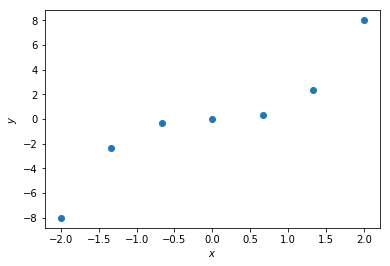

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. 
# Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

[-2  2] [ -2.53765263e-16  -2.53765263e-16]


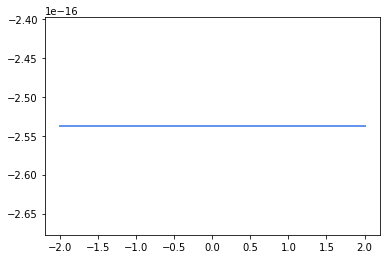

In [3]:
# ВЕРНО!
# mean = sum(y)/7 
# То же самое значение среднего по массиву можно получить так:
mean = np.mean(y)

X = np.array([-2,2])
y = np.empty(2)
y.fill(mean)
print(X, y)
plt.plot(X.reshape(-1,1), y, color="cornflowerblue", label="max_depth=2", linewidth=2)

In [4]:
# НЕВЕРНО!
# from sklearn.tree import DecisionTreeRegressor
# regr1 = DecisionTreeRegressor(max_depth=1)

# X_train = X.reshape(-1,1)
# # y_train = y.reshape(-1,1)

# print(X.shape, X_train.shape)
# # print(y.shape, y_train.shape)

# regr1.fit(X_train,y)

# X_test = np.arange(-2,2).reshape(-1,1)
# y_test = regr1.predict(X_test)

# # plt.figure()
# plt.scatter(X_train, y, s=15, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=2", linewidth=2)

In [5]:
# НЕВЕРНО!
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# print(X_train.shape, y_train.shape)

# regr1 = DecisionTreeRegressor(max_depth=1)
# regr1.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

# # plt.figure()
# plt.scatter(X_train, y_train, s=15, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=2", linewidth=2)

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
[-2.         -1.33333333 -0.66666667]
[ 0.          0.66666667  1.33333333  2.        ]
[-8.         -2.37037037 -0.2962963 ] [ 0.          0.2962963   2.37037037  8.        ]
-3.55555555556 2.66666666667


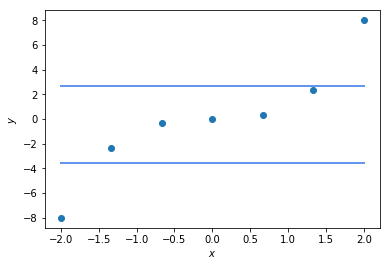

In [6]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# Ваш код здесь
# np.array_split(X, np.where(X<0.))

print(X)

X_test1 = X[:3]
print(X_test1)
X_test2 = X[3:]
print(X_test2)

y1 = X_test1 ** 3
y2 = X_test2 ** 3

print(y1,y2)

mean1 = np.mean(y1)
mean2 = np.mean(y2)
print(mean1, mean2)

X_test1 = np.array([-2,2])
y_test1 = np.empty(2)
y_test1.fill(mean1)

X_test2 = np.array([-2,2])
y_test2 = np.empty(2)
y_test2.fill(mean2)

plt.plot(X_test1.reshape(-1,1), y_test1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test2.reshape(-1,1), y_test2, color="cornflowerblue", label="max_depth=2", linewidth=2)

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [7]:
def regression_var_criterion(X, y, t):
    pass

In [8]:
# Ваш код здесь

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [9]:
# Ваш код здесь

**<font color='red'>Вопрос 2.</font> Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке [-2, 2]? Считаем только горизонтальные отрезки.**
- 2
- 3
- 4
- 5

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [10]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [11]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах", а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`.

In [12]:
# Ваш код здесь
df['test'] = 1
df['age_years'] = round(df['age']/365)

df['is_chol_1'] = pd.get_dummies(df[df['cholesterol']==1]['test'])
df['is_chol_2'] = pd.get_dummies(df[df['cholesterol']==2]['test'])
df['is_chol_3'] = pd.get_dummies(df[df['cholesterol']==3]['test'])

df['is_chol_1'].fillna(0, inplace=True)
df['is_chol_2'].fillna(0, inplace=True)
df['is_chol_3'].fillna(0, inplace=True)

df['is_gluc_1'] = pd.get_dummies(df[df['gluc']==1]['test'])
df['is_gluc_2'] = pd.get_dummies(df[df['gluc']==2]['test'])
df['is_gluc_3'] = pd.get_dummies(df[df['gluc']==3]['test'])

df['is_gluc_1'].fillna(0, inplace=True)
df['is_gluc_2'].fillna(0, inplace=True)
df['is_gluc_3'].fillna(0, inplace=True)


df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,test,age_years,is_chol_1,is_chol_2,is_chol_3,is_gluc_1,is_gluc_2,is_gluc_3
id,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,50.0,1.0,0.0,0.0,1.0,0.0,0.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,55.0,0.0,0.0,1.0,1.0,0.0,0.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1,52.0,0.0,0.0,1.0,1.0,0.0,0.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [13]:
y = df['cardio']
X = df.drop('cardio', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [16]:
# Ваш код здесь
clf = DecisionTreeClassifier(max_depth=3, random_state=17)
clf.fit(X_train, y_train)

export_graphviz(clf, feature_names=X.columns, 
out_file='test.dot', filled=True)
!dot -Tpng 'test.dot' -o 'test.png'

Error: dot: can't open 'test.dot'


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть разбиения по этим трем признакам можно найти в дереве)**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [ ]:
# Ваш код здесь

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [ ]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV # Ваш код здесь

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [ ]:
# Ваш код здесь

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`. 

In [ ]:
# Ваш код здесь

**<font color='red'>Вопрос 4.</font> Верно ли, что кривая валидации по максимальной глубине дерева при переборе `max_depth` от 2 до 10 монотонно возрастает или убывает? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 0.01 на отложенной выборке?**
- да, да
- да, нет
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках.

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [ ]:
# Ваш код здесь